    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

C:\Users\letap\AppData\Local\Temp\ipykernel_29924\2040581750.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  drybean.replace(to_replace = "DERMASON", value = 7, inplace = True)


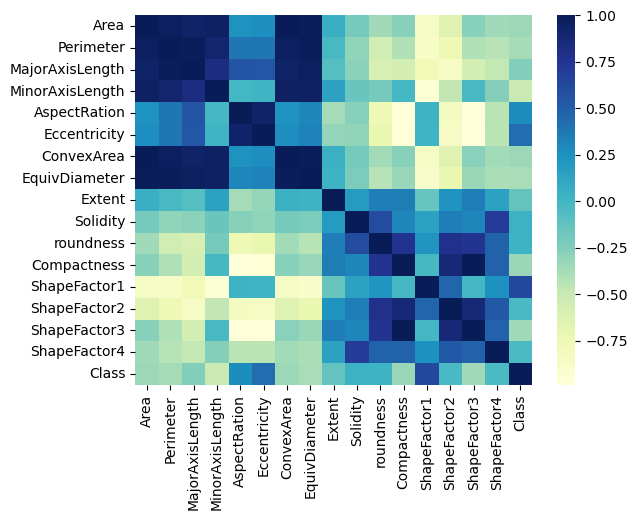

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sb
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils import shuffle

drybean = pd.read_csv("Dry_Bean_Dataset.csv")

#drybean = shuffle(drybean)

print(drybean.head())

drybean.replace(to_replace = "SEKER", value = 1, inplace = True)
drybean.replace(to_replace = "BOMBAY", value = 3, inplace = True)
drybean.replace(to_replace = "BARBUNYA", value = 2, inplace = True)
drybean.replace(to_replace = "CALI", value = 4, inplace = True)
drybean.replace(to_replace = "HOROZ", value = 5, inplace = True)
drybean.replace(to_replace = "SIRA", value = 6, inplace = True)
drybean.replace(to_replace = "DERMASON", value = 7, inplace = True)


plot = sb.heatmap(drybean.corr(numeric_only=True), cmap="YlGnBu", annot=False)

In [17]:
features = drybean.drop(["Class"], axis = 1) #drybean.filter(["AspectRation","Eccentricity","ShapeFactor1","ShapeFactor2","Solidity","Roundness"])
target = drybean.filter(["Class"])

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 42)

logistic_regression = LogisticRegression(random_state = 0, multi_class ="ovr")

model = logistic_regression.fit(X_train, y_train)

C:\Users\letap\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\letap\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9221446933529196
